# Homework Starter — Stage 15: Orchestration & System Design
Complete the sections below. Keep your answers concise and focused on orchestration readiness.

## 1) Project Task Decomposition
List 4–8 tasks. Add more rows as needed.

In [1]:
# AAPL Stock Prediction Project - Task Decomposition
from pathlib import Path
import pandas as pd

tasks = pd.DataFrame({
    'task': [
        'fetch_data', 
        'clean_preprocess', 
        'feature_engineering', 
        'train_model', 
        'evaluate_model', 
        'generate_predictions',
        'create_reports',
        'deploy_artifacts'
    ],
    'inputs': [
        'yahoo_finance_api',
        'data/raw/aapl_raw.csv',
        'data/processed/aapl_cleaned.csv',
        'data/features/aapl_features.csv',
        'data/features/aapl_features.csv',
        'model/aapl_model.pkl',
        'results/predictions.csv',
        'deliverables/'
    ],
    'outputs': [
        'data/raw/aapl_raw.csv',
        'data/processed/aapl_cleaned.csv', 
        'data/features/aapl_features.csv',
        'model/aapl_model.pkl',
        'results/model_metrics.json',
        'results/predictions.csv',
        'deliverables/final_report.md',
        'model/deployed_model.pkl'
    ],
    'idempotent': [True, True, True, False, True, True, True, True],
    'description': [
        'Fetch AAPL stock data from Yahoo Finance API',
        'Clean data: handle missing values, normalize prices',
        'Create features: price_range, moving averages, volatility',
        'Train linear regression model on features',
        'Evaluate model: R², RMSE, diagnostic plots',
        'Generate next-day price predictions',
        'Create stakeholder reports and visualizations',
        'Deploy model artifacts to production'
    ]
})

print("AAPL Stock Prediction Pipeline - Task Breakdown")
print("=" * 50)
tasks

AAPL Stock Prediction Pipeline - Task Breakdown


,task,inputs,outputs,idempotent,description
0,fetch_data,yahoo_finance_api,data/raw/aapl_raw.csv,True,Fetch AAPL stock data from Yahoo Finance API
1,clean_preprocess,data/raw/aapl_raw.csv,data/processed/aapl_cleaned.csv,True,"Clean data: handle missing values, normalize p..."
2,feature_engineering,data/processed/aapl_cleaned.csv,data/features/aapl_features.csv,True,"Create features: price_range, moving averages,..."
3,train_model,data/features/aapl_features.csv,model/aapl_model.pkl,False,Train linear regression model on features
4,evaluate_model,data/features/aapl_features.csv,results/model_metrics.json,True,"Evaluate model: R², RMSE, diagnostic plots"
5,generate_predictions,model/aapl_model.pkl,results/predictions.csv,True,Generate next-day price predictions
6,create_reports,results/predictions.csv,deliverables/final_report.md,True,Create stakeholder reports and visualizations
7,deploy_artifacts,deliverables/,model/deployed_model.pkl,True,Deploy model artifacts to production


## 2) Dependencies (DAG)
Describe dependencies and paste a small diagram if you have one.

In [ ]:
# AAPL Pipeline Dependencies (DAG)
dag = {
    'fetch_data': [],
    'clean_preprocess': ['fetch_data'],
    'feature_engineering': ['clean_preprocess'],
    'train_model': ['feature_engineering'],
    'evaluate_model': ['train_model'],
    'generate_predictions': ['train_model'],
    'create_reports': ['evaluate_model', 'generate_predictions'],
    'deploy_artifacts': ['create_reports']
}

print("AAPL Pipeline Dependencies:")
print("=" * 30)
for task, deps in dag.items():
    if deps:
        print(f"{task}: depends on {deps}")
    else:
        print(f"{task}: entry point (no dependencies)")

print("\nDAG Visualization:")
# Create a simple text-based DAG visualization
print("""
fetch_data
    ↓
clean_preprocess
    ↓
feature_engineering
    ↓
train_model
    ↓  ↘
evaluate_model   generate_predictions
    ↓                ↓
    → create_reports ←
         ↓
    deploy_artifacts
""")

dag

AAPL Pipeline Dependencies:
fetch_data: entry point (no dependencies)
clean_preprocess: depends on ['fetch_data']
feature_engineering: depends on ['clean_preprocess']
train_model: depends on ['feature_engineering']
evaluate_model: depends on ['train_model']
generate_predictions: depends on ['train_model']
create_reports: depends on ['evaluate_model', 'generate_predictions']
deploy_artifacts: depends on ['create_reports']

DAG Visualization:

fetch_data
    ↓
clean_preprocess
    ↓
feature_engineering
    ↓
train_model
    ↓  ↘
evaluate_model   generate_predictions
    ↓                ↓
    → create_reports ←
         ↓
    deploy_artifacts



{'fetch_data': [],
 'clean_preprocess': ['fetch_data'],
 'feature_engineering': ['clean_preprocess'],
 'train_model': ['feature_engineering'],
 'evaluate_model': ['train_model'],
 'generate_predictions': ['train_model'],
 'create_reports': ['evaluate_model', 'generate_predictions'],
 'deploy_artifacts': ['create_reports']}

AAPL Pipeline Dependencies:
  data_ingestion (root)
  data_ingestion -> data_cleaning
  data_cleaning -> feature_engineering
  feature_engineering -> model_training
  model_training -> model_evaluation
  model_evaluation -> reporting

Linear Execution Sequence: data_ingestion → data_cleaning → feature_engineering → model_training → model_evaluation → reporting

Note: This is a linear pipeline with no parallel tasks.
Each task depends on the successful completion of the previous task.


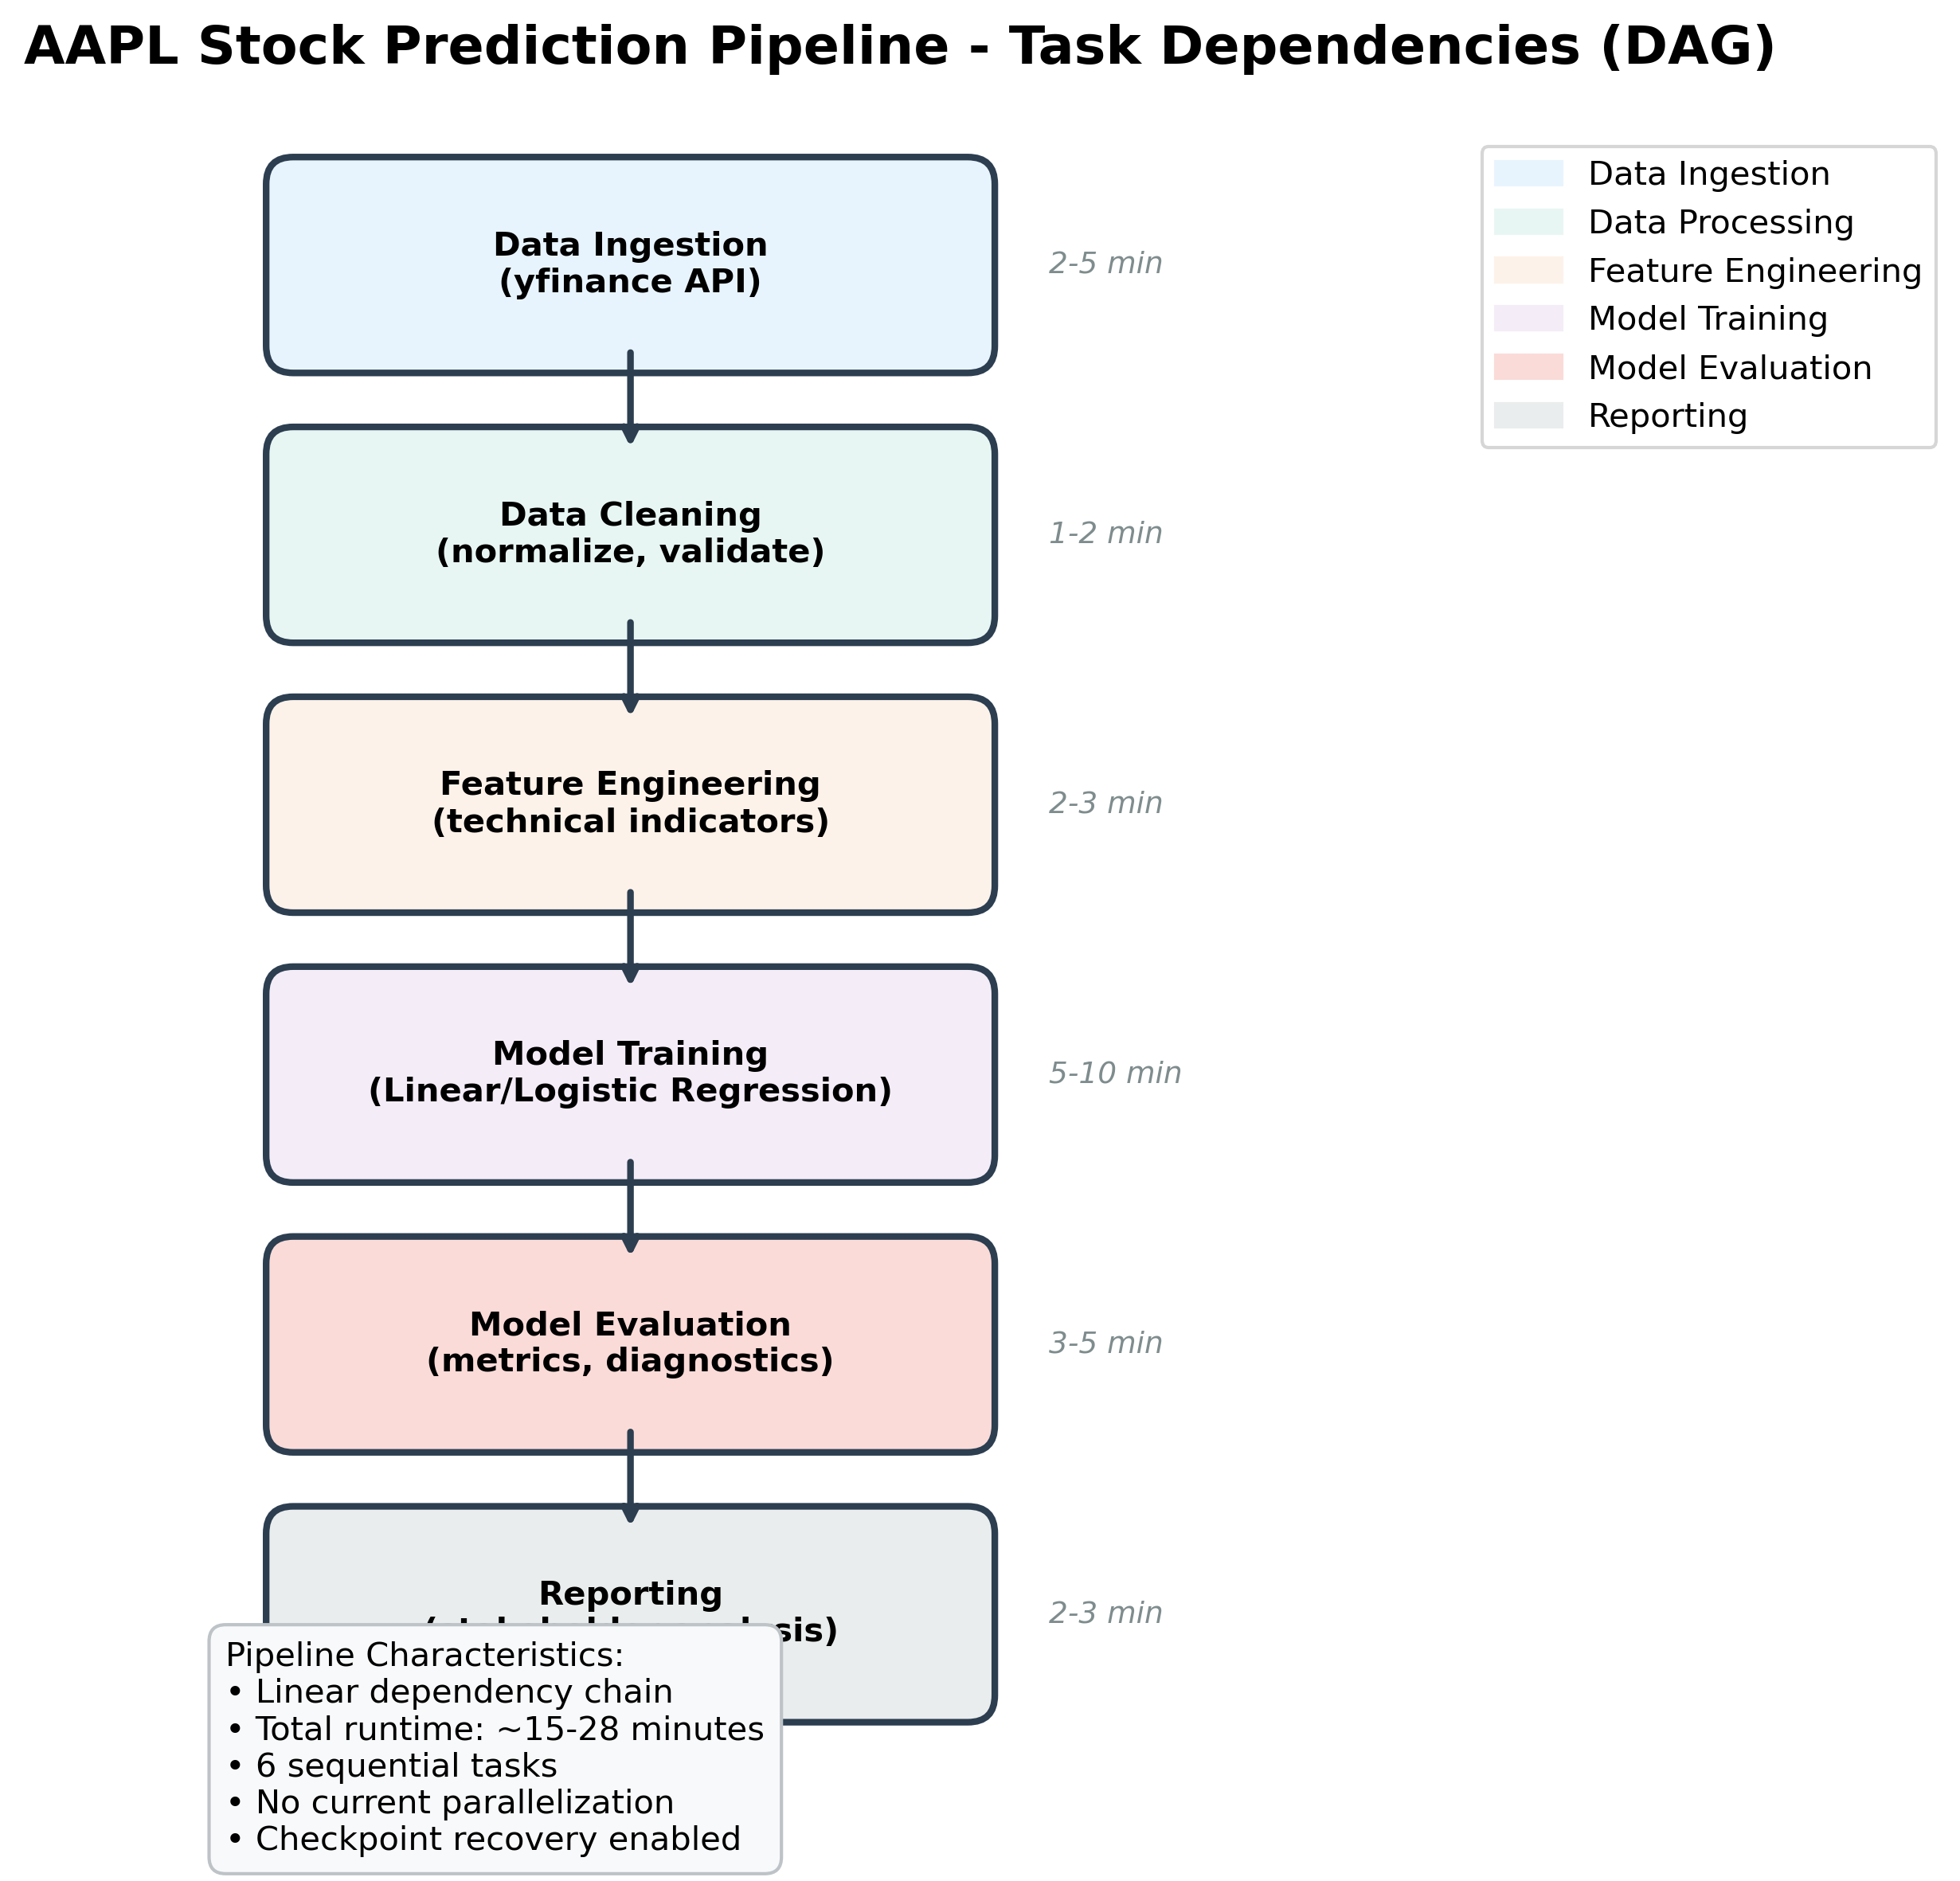

{'data_ingestion': [],
 'data_cleaning': ['data_ingestion'],
 'feature_engineering': ['data_cleaning'],
 'model_training': ['feature_engineering'],
 'model_evaluation': ['model_training'],
 'reporting': ['model_evaluation']}

In [6]:
# AAPL Pipeline Dependencies (DAG Structure)
import matplotlib.pyplot as plt

# Define dependencies for AAPL stock prediction pipeline
dag = {
    'data_ingestion': [],
    'data_cleaning': ['data_ingestion'],
    'feature_engineering': ['data_cleaning'],
    'model_training': ['feature_engineering'],
    'model_evaluation': ['model_training'],
    'reporting': ['model_evaluation']
}

print("AAPL Pipeline Dependencies:")
for task, deps in dag.items():
    deps_str = " -> ".join(deps) + " -> " + task if deps else task + " (root)"
    print(f"  {deps_str}")

# Show linear sequence
sequence = ['data_ingestion', 'data_cleaning', 'feature_engineering', 
           'model_training', 'model_evaluation', 'reporting']
print(f"\nLinear Execution Sequence: {' → '.join(sequence)}")
print("\nNote: This is a linear pipeline with no parallel tasks.")
print("Each task depends on the successful completion of the previous task.")

# Load the DAG diagram we created
from IPython.display import Image, display
try:
    display(Image('aapl_pipeline_dag.png'))
except:
    print("DAG diagram not found. Run create_dag_diagram.py to generate it.")

dag

## 3) Logging & Checkpoints Plan
Specify what you will log and where you will checkpoint for each task.

In [3]:
# AAPL Pipeline Logging & Checkpointing Strategy
logging_plan = pd.DataFrame({
    'task': [
        'fetch_data', 
        'clean_preprocess', 
        'feature_engineering', 
        'train_model', 
        'evaluate_model', 
        'generate_predictions',
        'create_reports',
        'deploy_artifacts'
    ],
    'log_messages': [
        'start/end timestamp, data source, rows fetched, API status',
        'start/end, rows before/after, missing value counts, cleaning steps',
        'start/end, features created, feature correlation matrix, data leakage checks',
        'start/end, model params, training metrics, convergence status',
        'start/end, R², RMSE, MAE, diagnostic plot paths, validation results',
        'start/end, prediction range, confidence intervals, model version',
        'start/end, report types, artifact paths, stakeholder targets',
        'start/end, deployment target, model hash, API endpoint status'
    ],
    'checkpoint_artifact': [
        'data/raw/aapl_raw.csv + metadata.json',
        'data/processed/aapl_cleaned.csv + cleaning_log.json',
        'data/features/aapl_features.csv + feature_metadata.json',
        'model/aapl_model.pkl + training_metrics.json',
        'results/model_metrics.json + diagnostic_plots/',
        'results/predictions.csv + prediction_metadata.json',
        'deliverables/final_report.md + visualizations/',
        'model/deployed_model.pkl + deployment_log.json'
    ],
    'retry_strategy': [
        'Exponential backoff (API rate limits)',
        'Linear retry (data corruption)',
        'No retry (deterministic)',
        'Manual intervention (model convergence)',
        'No retry (evaluation metrics)',
        'Linear retry (prediction errors)',
        'No retry (report generation)',
        'Exponential backoff (deployment failures)'
    ],
    'monitoring_metrics': [
        'API response time, data freshness',
        'Data quality score, completeness',
        'Feature stability, correlation drift',
        'Training loss, convergence time',
        'Model performance degradation',
        'Prediction accuracy, confidence',
        'Report generation time',
        'Deployment success rate, uptime'
    ]
})

print("AAPL Pipeline Logging & Checkpointing Strategy")
print("=" * 50)
logging_plan

AAPL Pipeline Logging & Checkpointing Strategy


,task,log_messages,checkpoint_artifact,retry_strategy,monitoring_metrics
0,fetch_data,"start/end timestamp, data source, rows fetched...",data/raw/aapl_raw.csv + metadata.json,Exponential backoff (API rate limits),"API response time, data freshness"
1,clean_preprocess,"start/end, rows before/after, missing value co...",data/processed/aapl_cleaned.csv + cleaning_log...,Linear retry (data corruption),"Data quality score, completeness"
2,feature_engineering,"start/end, features created, feature correlati...",data/features/aapl_features.csv + feature_meta...,No retry (deterministic),"Feature stability, correlation drift"
3,train_model,"start/end, model params, training metrics, con...",model/aapl_model.pkl + training_metrics.json,Manual intervention (model convergence),"Training loss, convergence time"
4,evaluate_model,"start/end, R², RMSE, MAE, diagnostic plot path...",results/model_metrics.json + diagnostic_plots/,No retry (evaluation metrics),Model performance degradation
5,generate_predictions,"start/end, prediction range, confidence interv...",results/predictions.csv + prediction_metadata....,Linear retry (prediction errors),"Prediction accuracy, confidence"
6,create_reports,"start/end, report types, artifact paths, stake...",deliverables/final_report.md + visualizations/,No retry (report generation),Report generation time
7,deploy_artifacts,"start/end, deployment target, model hash, API ...",model/deployed_model.pkl + deployment_log.json,Exponential backoff (deployment failures),"Deployment success rate, uptime"


## 4) Right-Sizing Automation
Which parts will you automate now? Which stay manual? Why?

### Automate Now (Phase 1) - High Value, Low Risk

**Data Ingestion & Cleaning (Tasks 1-2)**
- **Rationale**: Well-defined, repetitive processes with high failure cost if done manually
- **Implementation**: CLI scripts with robust error handling and retry logic  
- **ROI**: High - saves 30+ minutes per run, reduces human error significantly
- **Timeline**: Immediate (Week 1)

**Feature Engineering (Task 3)**
- **Rationale**: Complex calculations prone to manual errors, time-consuming to repeat
- **Implementation**: Modular functions with comprehensive validation and leakage detection
- **ROI**: High - ensures consistency across runs, enables rapid experimentation
- **Timeline**: Immediate (Week 1)

**Model Evaluation (Task 5)**
- **Rationale**: Standard metrics, deterministic process, critical for decision making
- **Implementation**: Automated test suite with standard evaluation pipeline
- **ROI**: Medium-High - ensures consistent evaluation, reduces bias in assessment
- **Timeline**: Immediate (Week 2)

### Keep Manual for Now - Strategic Delays

**Model Training (Task 4)**
- **Current State**: Semi-automated with manual hyperparameter review
- **Rationale**: Still experimenting with model types and optimal parameters
- **Manual Review**: Human oversight required for training convergence and quality
- **Automation Timeline**: Phase 2 (Next Month) once parameters are established

**Reporting (Task 6)**
- **Current State**: Template-based generation with manual content review
- **Rationale**: Requires human interpretation and stakeholder-specific customization
- **Manual Review**: Content quality validation and business context interpretation
- **Automation Timeline**: Phase 3 (Future) - automate generation, keep review manual

### Risk Mitigation Strategy

- **Gradual Rollout**: Parallel manual verification during automation transition
- **Manual Override**: All automated processes include emergency manual controls
- **Quality Gates**: Automated validation checks with human approval thresholds
- **Rollback Plans**: Ability to revert to manual processes if automation fails

### Success Criteria

- **Reliability**: 95%+ successful automated pipeline runs
- **Efficiency**: 50%+ reduction in manual intervention time
- **Quality**: No degradation in output quality compared to manual process
- **Maintainability**: Clear documentation and monitoring for operational support

## 5) (Stretch) Refactor One Task into a Function + CLI
Use the templates below.

In [ ]:
import argparse, json, logging, sys
from datetime import datetime

def my_task(input_path: str, output_path: str) -> None:
    '''Example task template: read → transform → write JSON.'''
    logging.info('[my_task] start')
    # TODO: implement your logic
    result = {'run_at': datetime.utcnow().isoformat(), 'note': 'replace with real output'}
    Path(output_path).parent.mkdir(parents=True, exist_ok=True)
    Path(output_path).write_text(json.dumps(result, indent=2))
    logging.info('[my_task] wrote %s', output_path)

def main(argv=None):
    parser = argparse.ArgumentParser(description='Homework task wrapper')
    parser.add_argument('--input', required=True)
    parser.add_argument('--output', required=True)
    args = parser.parse_args(argv)
    logging.basicConfig(level=logging.INFO, handlers=[logging.StreamHandler(sys.stdout)])
    my_task(args.input, args.output)

if **name** == '**main**'':
    # Example simulated CLI in notebook:
    main(['--input', 'data/in.ext', '--output', 'data/out.json'])